<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

In [1]:
%tensorflow_version 1.8
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.8`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
name = [ ]
name_List = [ ]
abstract = [ ]
abstract_List=[ ]
page_number = [0,10,20,30,40,50,60,70,80,90]
for i in page_number:
 page = requests.get('https://citeseerx.ist.psu.edu/search;jsessionid=87FF6C66EA09F22314C131669600CF98?q=natural+language+processing&t=doc&sort=rlv&start='+ str (i), verify=False)
 soup = BeautifulSoup(page.content,'html.parser')
 name.append(soup.find_all('a',class_='remove doc_details'))
 abstract.append(soup.find_all('div',class_='pubabstract'))

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [3]:
for j in name:
  for k in range(len(j)):
    name_List.append(j[k].get_text())

In [4]:
for l in abstract:
  for m in range(len(l)):
    abstract_List.append(l[m].get_text())

In [5]:
df = pd.DataFrame({'Article':name_List,'Abstract': abstract_List})

In [6]:
df.head()

,Article,Abstract
0,\n Foundations of statistical...,\n Abstract not found\n ...
1,\n A Maximum Entropy approach...,\n describe a method for s...
2,\nNatural Language Processing\n,\n Scaling conditional rand...
3,\n Linguistics and Natural La...,\n The paper addresses the ...
4,\nNatural Language Processing\n,\n In most natural language...


In [7]:
#1 Noise removal
df['Article'] = df['Article'].replace('\n','',regex = True)
df['Abstract'] = df['Abstract'].replace('\n','',regex = True)
df['Article'] = df['Article'].replace('[^\w\s]','',regex = True)
df['Abstract'] = df['Abstract'].replace('[^\w\s]','',regex = True)
#2 Remove numbers
df['Article'] = df['Article'].str.replace('\d+','')
df['Abstract'] = df['Abstract'].str.replace('\d+','')
#3 Remove StopWords
stop_Words = ["i", "me", "my", "myself", "we", "our", "ours", 
              "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her",
              "hers", "herself", "it", "its", "itself", "they", "them",
              "their", "theirs", "themselves", "what", "which", "who",
              "whom", "this", "that", "these", "those", "am", "is",
              "are", "was", "were", "be", "been", "being", "have",
              "has", "had", "having", "do", "does", "did", "doing",
              "a", "an", "the", "and", "but", "if", "or", "because",
              "as", "until", "while", "of", "at", "by", "for", "with",
              "about", "against", "between", "into", "through",
              "during", "before", "after", "above", "below", "to",
              "from", "up", "down", "in", "out", "on", "off", "over",
              "under", "again", "further", "then", "once", "here",
              "there", "when", "where", "why", "how", "all", "any",
              "both", "each", "few", "more", "most", "other", "some",
              "such", "no", "nor", "not", "only", "own", "same", "so",
              "than", "too", "very", "s", "t", "can", "will", "just",
              "don", "should", "now"]
# stop = stopwords.words('english')
df['Article'] = df['Article'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_Words))
df['Abstract'] = df['Abstract'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_Words))
#4 Lowercase all text
df['Article'] = df['Article'].str.lower()
df['Abstract'] = df['Abstract'].str.lower()
#5 Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Article'] = df['Article'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Abstract']= df['Abstract'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#6 Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
df['Abstract']=df['Abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df.head(10)

,Article,Abstract
0,foundat statist natur languag process,abstract found
1,a maximum entropi approach natur languag process,describ method statist model base maximum entr...
2,natur languag process,scale condit random field natur languag proces...
3,linguist natur languag process,the paper address issu cooper linguist natur l...
4,natur languag process,in natur languag process applic descript logic...
5,natur languag process almost scratch,we propos unifi neural network architectur lea...
6,natur languag process,natur languag process the subject natur langua...
7,natur languag processingrobot,robot interact human facetofac use natur langu...
8,tutori natur languag process,natur languag languag spoken human current yet...
9,ambigu natur languag process,abstract ambigu refer abil one mean understood...


# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [9]:
# Write your code here
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['WordToken_Abstract'] = df['Abstract'].apply(lambda x: word_tokenize(x))
df['WordToken_Article'] = df['Article'].apply(lambda x: word_tokenize(x))

In [12]:
df['TriGram_Abstract'] = df['WordToken_Abstract'].apply(lambda x: list (ngrams(x,3)))
df['TriGram_Article'] = df['WordToken_Article'].apply(lambda x: list (ngrams(x,3)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: generator 'ngrams' raised StopIteration
  """Entry point for launching an IPython kernel.


In [13]:
df['TriGram_Abstract'].head()

0                                                   []
1    [(describ, method, statist), (method, statist,...
2    [(scale, condit, random), (condit, random, fie...
3    [(the, paper, address), (paper, address, issu)...
4    [(in, natur, languag), (natur, languag, proces...
Name: TriGram_Abstract, dtype: object

In [14]:
df['TriGram_Article'].head()

0    [(foundat, statist, natur), (statist, natur, l...
1    [(a, maximum, entropi), (maximum, entropi, app...
2                          [(natur, languag, process)]
3    [(linguist, natur, languag), (natur, languag, ...
4                          [(natur, languag, process)]
Name: TriGram_Article, dtype: object

In [15]:
from itertools import chain

article_Trigram_list = list (chain(*df['TriGram_Article']))
abstract_Trigram_list = list (chain(*df['TriGram_Abstract']))


In [16]:
print(Counter(article_Trigram_list))

Counter({('natur', 'languag', 'process'): 98, ('learn', 'natur', 'languag'): 5, ('languag', 'process', 'system'): 5, ('for', 'natur', 'languag'): 5, ('languag', 'process', 'inform'): 4, ('process', 'inform', 'retriev'): 4, ('statist', 'natur', 'languag'): 2, ('approach', 'natur', 'languag'): 2, ('languag', 'process', 'a'): 2, ('overview', 'natur', 'languag'): 2, ('evalu', 'natur', 'languag'): 2, ('languag', 'process', 'use'): 2, ('logic', 'natur', 'languag'): 2, ('model', 'natur', 'languag'): 2, ('on', 'natur', 'languag'): 2, ('languag', 'process', 'plan'): 2, ('process', 'plan', 'recognit'): 2, ('machin', 'learn', 'natur'): 2, ('languag', 'process', 'in'): 2, ('computerassist', 'languag', 'learn'): 2, ('in', 'natur', 'languag'): 2, ('foundat', 'statist', 'natur'): 1, ('a', 'maximum', 'entropi'): 1, ('maximum', 'entropi', 'approach'): 1, ('entropi', 'approach', 'natur'): 1, ('linguist', 'natur', 'languag'): 1, ('languag', 'process', 'almost'): 1, ('process', 'almost', 'scratch'): 1, ('

In [17]:
print(Counter(abstract_Trigram_list))

Counter({('natur', 'languag', 'process'): 72, ('languag', 'process', 'nlp'): 19, ('languag', 'process', 'system'): 6, ('use', 'natur', 'languag'): 4, ('languag', 'process', 'the'): 3, ('natur', 'languag', 'languag'): 3, ('languag', 'process', 'we'): 3, ('languag', 'process', 'techniqu'): 3, ('word', 'sen', 'disambigu'): 3, ('process', 'nlp', 'task'): 3, ('applic', 'natur', 'languag'): 3, ('relat', 'natur', 'languag'): 3, ('lexsign', 'senseid', 'senseid'): 3, ('in', 'natur', 'languag'): 2, ('languag', 'process', 'applic'): 2, ('neural', 'network', 'architectur'): 2, ('languag', 'process', 'task'): 2, ('partofspeech', 'tag', 'chunk'): 2, ('tag', 'chunk', 'name'): 2, ('chunk', 'name', 'entiti'): 2, ('languag', 'languag', 'spoken'): 2, ('statist', 'natur', 'languag'): 2, ('inform', 'retriev', 'system'): 2, ('in', 'paper', 'describ'): 2, ('process', 'nlp', 'techniqu'): 2, ('abstract', 'natur', 'languag'): 2, ('thi', 'paper', 'review'): 2, ('process', 'system', 'the'): 2, ('recent', 'develop

n-grams are used for a variety of things. Some examples include auto completion of sentences (such as the one we see in Gmail these days)
, auto spell check (yes, we can do that as well), and to a certain extent, we can check for grammar in a given sentence.

Suppose we’re calculating the probability of word “w1” occurring after the word “w2,” then the formula for this is as follows: count(w2 w1)/ count(w2)

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [18]:
df['biGrams_Article'] = df['WordToken_Article'].apply(lambda x: list (ngrams(x,2)))
df['biGrams_Abstract'] = df['WordToken_Abstract'].apply(lambda x: list (ngrams(x,2)))

In [19]:
lis_biGrams_Article = list (chain(*df['biGrams_Article']))
lis_biGrams_Abstract = list (chain(*df['biGrams_Abstract']))
coun_biGrams_Article = Counter(lis_biGrams_Article)
coun_biGrams_Abstract = Counter(lis_biGrams_Abstract)
key_biGrams_Article = [ ]
key_biGrams_Abstract = [ ]
for key in coun_biGrams_Article.keys() :
   key_biGrams_Article.append(key)
for key in coun_biGrams_Abstract.keys() : 
   key_biGrams_Abstract.append(key)
coun_biGrams_Article_Values = [] 
coun_biGrams_Abstract_Values = [ ]
for key in coun_biGrams_Article.keys() : 
    coun_biGrams_Article_Values.append(coun_biGrams_Article[key]) 
for key in coun_biGrams_Abstract.keys() : 
    coun_biGrams_Abstract_Values.append(coun_biGrams_Abstract[key]) 
df2 = pd.DataFrame({'biGrams_Article': key_biGrams_Article,'count_biGrams_Article':coun_biGrams_Article_Values})
df3 = pd.DataFrame({'biGrams_Abstract':key_biGrams_Abstract,'count_biGrams_Abstract':coun_biGrams_Abstract_Values})

In [20]:
df2.head()

,biGrams_Article,count_biGrams_Article
0,"(foundat, statist)",1
1,"(statist, natur)",2
2,"(natur, languag)",99
3,"(languag, process)",98
4,"(a, maximum)",1


In [21]:
df3.head()

,biGrams_Abstract,count_biGrams_Abstract
0,"(abstract, found)",8
1,"(describ, method)",1
2,"(method, statist)",1
3,"(statist, model)",2
4,"(model, base)",1


In [22]:
#Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33

df['uniGrams_Article'] = df['WordToken_Article'].apply(lambda x: list (ngrams(x,1)))
df['uniGrams_Abstract'] = df['WordToken_Abstract'].apply(lambda x: list (ngrams(x,1)))


In [23]:
lis_uniGrams_Article = list (chain(*df['uniGrams_Article']))
lis_uniGrams_Abstract = list (chain(*df['uniGrams_Abstract']))

coun_uniGrams_Article = Counter(lis_uniGrams_Article)
coun_uniGrams_Abstract = Counter(lis_uniGrams_Abstract)

key_uniGrams_Article = [ ]
key_uniGrams_Abstract = [ ]

for key in coun_uniGrams_Article.keys() :
   key_uniGrams_Article.append(key)
for key in coun_uniGrams_Abstract.keys() : 
   key_uniGrams_Abstract.append(key)

coun_uniGrams_Article_Values = [] 
coun_uniGrams_Abstract_Values = [ ]


for key in coun_uniGrams_Article.keys() : 
    coun_uniGrams_Article_Values.append(coun_uniGrams_Article[key]) 
for key in coun_uniGrams_Abstract.keys() : 
    coun_uniGrams_Abstract_Values.append(coun_uniGrams_Abstract[key]) 

df4 = pd.DataFrame({'uniGrams_Article': key_uniGrams_Article,'count_uniGrams_Article':coun_uniGrams_Article_Values})
df5 = pd.DataFrame({'uniGrams_Abstract':key_uniGrams_Abstract,'count_uniGrams_Abstract':coun_uniGrams_Abstract_Values})

In [24]:
df4.head()

,uniGrams_Article,count_uniGrams_Article
0,"(foundat,)",1
1,"(statist,)",4
2,"(natur,)",99
3,"(languag,)",101
4,"(process,)",100


In [25]:
df5.head()

,uniGrams_Abstract,count_uniGrams_Abstract
0,"(abstract,)",19
1,"(found,)",8
2,"(describ,)",11
3,"(method,)",8
4,"(statist,)",11


In [26]:
print(lis_uniGrams_Article[-2:])

[('languag',), ('process',)]


In [27]:
prob_bigrams_Articles = [coun_biGrams_Article_Values[i]/coun_uniGrams_Article_Values[i+1] for i in range(4)]
prob_bigrams_Articles

[0.25, 0.020202020202020204, 0.9801980198019802, 0.98]

In [28]:
prob_bigrams_Abstract = [coun_biGrams_Abstract_Values[i]/coun_uniGrams_Abstract_Values[i+1] for i in range(4)]
prob_bigrams_Abstract

[1.0, 0.09090909090909091, 0.125, 0.18181818181818182]

In [29]:
list_Abstract = df['Abstract'].tolist()

In [30]:
import spacy
nlp = spacy.load('en_core_web_sm')
li_WordToken_Abstract = df['WordToken_Abstract'].tolist()
df['doc_Abstract'] = df['Abstract'].apply(lambda x: nlp(x) )

In [31]:
NN_Abstract_text = [ ]
for i in df['doc_Abstract']:
  for j in i.noun_chunks:
     NN_Abstract_text.append(j.text)

In [32]:
NN_Abstract_text

['abstract',
 'describ method statist model base',
 'maximum entropi',
 'we',
 'maximumlikelihood approach automat',
 'maximum entropi model',
 'describ implement approach',
 'sever problem natur languag process',
 'scale',
 'random field natur languag process term condit term',
 'copyright work deposit minerva access',
 'the paper address issu cooper linguist natur languag process nlp gener',
 'linguist machin translat',
 'it',
 'one direct cooper name applic',
 'natur languag process applic descript logic',
 'encod knowledg base syntact semant pragmat element',
 'natur languag gener process',
 'more recent descript logic',
 'we',
 'neural network architectur',
 'algorithm appli',
 'variou natur languag process task',
 'includ partofspeech',
 'tag chunk name',
 'entiti recognit semant role label thi versatil achiev tri',
 'task',
 'natur languag',
 'the subject natur languag process',
 'narrow sen',
 'broad sen cover process issu level natur languag',
 'includ speech recognit syntact 

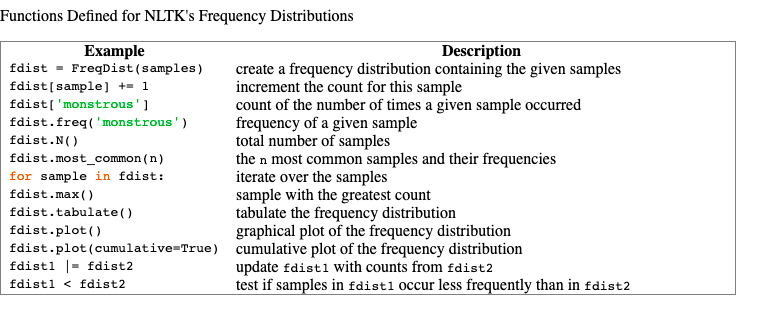

In [33]:
from nltk.probability import FreqDist

In [45]:
fdist = FreqDist(NN_Abstract_text)
fdist


FreqDist({'a fundament issu natur languag process prerequisit enorm quantiti preprogram knowledg concern': 1,
          'a goal': 1,
          'a rang evalu strategi': 1,
          'a result': 1,
          'abil': 1,
          'abstract': 10,
          'abstract ambigu': 1,
          'abstract languag way': 1,
          'abstract mani inform retrievalir system retriev relev document base exact match keyword queri document thi method degrad precis rate': 1,
          'abstract natur languag process': 1,
          'abstract natur languag process theoret motiv rang comput techniqu analys': 1,
          'abstract test natur languag requir standard approach system': 1,
          'abstract thi paper': 1,
          'abstract thi thesi examin use': 1,
          'abstractnatur languag process': 1,
          'abstractnatur languag process nlp effect approach': 1,
          'acquilex demonstr': 1,
          'acquir': 1,
          'action dure': 1,
          'addit semant knowledg automat': 1,
   

In [46]:
df7 = pd.DataFrame({'NN_Abstract_text': list (fdist.keys()), 'NN_Abstract_Count': list ( fdist.values())})

In [55]:
df7.head()

,NN_Abstract_text,NN_Abstract_freq
0,abstract,10
1,describ method statist model base,1
2,maximum entropi,1
3,we,24
4,maximumlikelihood approach automat,1


In [56]:
df7['NN_Abstract_Relative_Probability'] = df7['NN_Abstract_Count'].apply(lambda x: x/fdist['we'])

In [57]:
df7.head()

,NN_Abstract_text,NN_Abstract_freq,NN_Abstract_Relative_Probability
0,abstract,10,0.416667
1,describ method statist model base,1,0.041667
2,maximum entropi,1,0.041667
3,we,24,1.000000
4,maximumlikelihood approach automat,1,0.041667


# **Question 2: Undersand TF-IDF and Document representation**

(40 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

# **Question 3: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file

# Link: 